# Data Visualisation Assignment 1
The assignment was completed using pandas, and seaborn libraries in python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the data
The table provides average annual temperature differences per equatorial zone. In addition, average global and hemispheres' temperatures are included. Since temperature is a continuous measure we will make use of line plots for the following representations.

In [76]:
df=pd.read_csv("ZonAnn.Ts+dSST.csv",sep=";")
df_unpiv= pd.melt(df, id_vars='Year', value_vars=["NHem","SHem","Glob",
                                                  "64N-90N","44N-64N","24N-44N",
                                                  "EQU-24N","24S-EQU","44S-24S",
                                                  "64S-44S","90S-64S","24N-90N",
                                                  "24S-24N","90S-24S",])
df_unpiv.rename(columns={"Year":"Year","variable":"Attribute","value":"Temperature"},inplace=True)
df= df_unpiv.pivot("Year", "Attribute", "Temperature")
df

Attribute,24N-44N,24N-90N,24S-24N,24S-EQU,44N-64N,44S-24S,64N-90N,64S-44S,90S-24S,90S-64S,EQU-24N,Glob,NHem,SHem
Year,,,,,,,,,,,,,,
1880,-0.29,-0.37,-0.12,-0.09,-0.48,-0.04,-0.80,0.05,-0.02,0.66,-0.16,-0.17,-0.29,-0.04
1881,-0.21,-0.35,0.11,0.12,-0.43,-0.05,-0.91,-0.07,-0.07,0.58,0.09,-0.08,-0.18,0.01
1882,-0.17,-0.31,-0.04,-0.03,-0.26,0.01,-1.41,0.04,0.01,0.61,-0.06,-0.11,-0.22,-0.01
1883,-0.28,-0.35,-0.16,-0.14,-0.54,-0.04,-0.19,0.07,-0.01,0.49,-0.18,-0.17,-0.29,-0.06
1884,-0.48,-0.60,-0.14,-0.15,-0.62,-0.19,-1.30,-0.02,-0.14,0.64,-0.13,-0.28,-0.43,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1.05,1.24,0.67,0.61,1.09,0.79,2.14,0.38,0.69,0.97,0.72,0.84,1.03,0.65
2019,0.99,1.41,0.89,0.88,1.43,0.74,2.70,0.40,0.65,0.86,0.90,0.98,1.21,0.74
2020,1.19,1.67,0.86,0.83,1.82,0.58,2.92,0.39,0.57,0.92,0.88,1.02,1.35,0.68


### Ploting Global Temperature
There is a clear increase of the global temperature over the last 100 years.

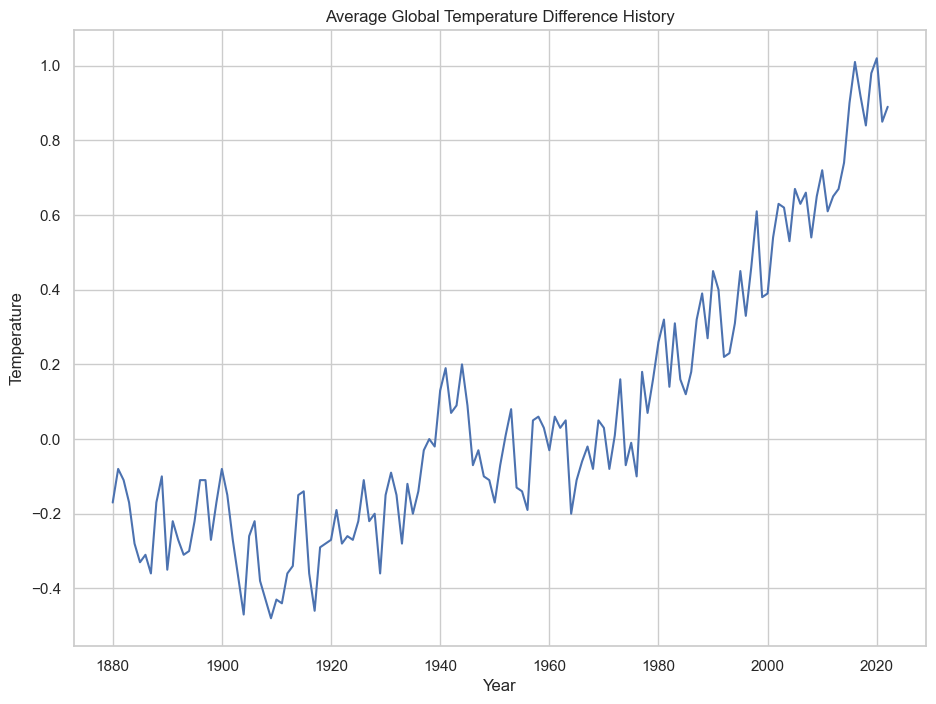

In [5]:
data_glob=df.loc[:,["Glob"]].rename(columns={"Glob":"Global"})
data_glob.reset_index(inplace=True)
data_glob_unpiv=pd.melt(data_glob, id_vars="Year", value_vars=['Global'],
                   value_name="Temperature").rename(columns={"Attribute":"Global"})
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
sns.lineplot(data=data_glob_unpiv, x="Year", y="Temperature",).set(title="Average Global Temperature Difference History")
plt.show()

### Ploting the average temperature of each hemishere
It seems the temperature increase is higher on the north hemisphere.

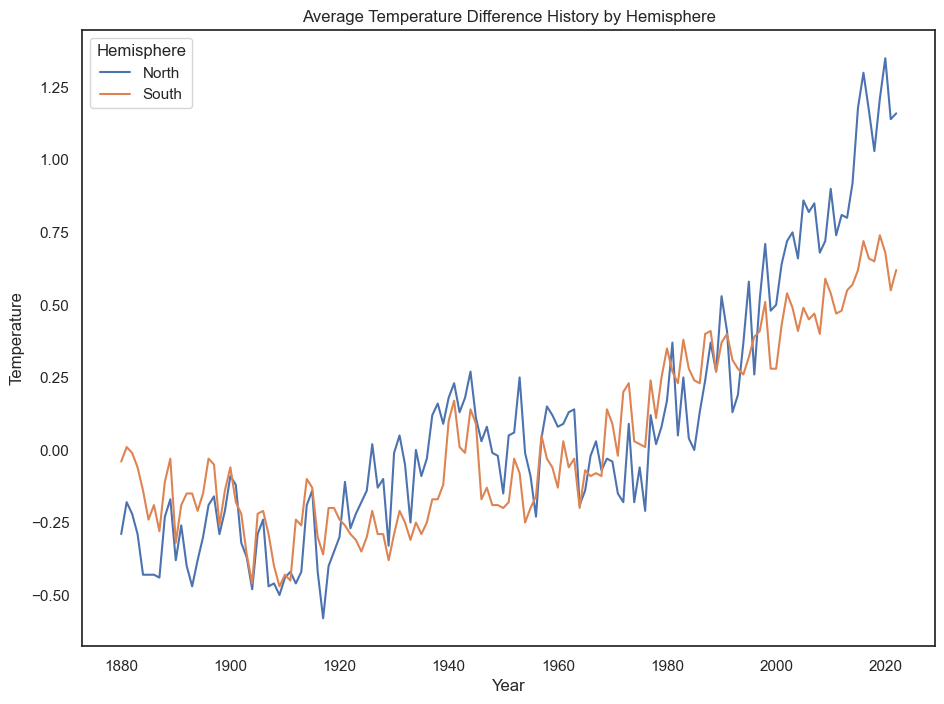

In [6]:
data_hem=df.loc[:,["NHem","SHem"]].rename(columns={"NHem":"North","SHem":"South"})
data_hem.reset_index(inplace=True)
data_hem_unpiv=pd.melt(data_hem, id_vars="Year", value_vars=['North', 'South'],
                   value_name="Temperature").rename(columns={"Attribute":"Hemisphere"})
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("white")
sns.lineplot(data=data_hem_unpiv, x="Year", y="Temperature", 
             hue="Hemisphere").set(title="Average Temperature Difference History by Hemisphere")
plt.show()

### Ploting the average temperature in the three main equatorial bands
The hue is chosen to change from light to dark red from south to north.
The average temperature increase is higher as we are moving from south to north.

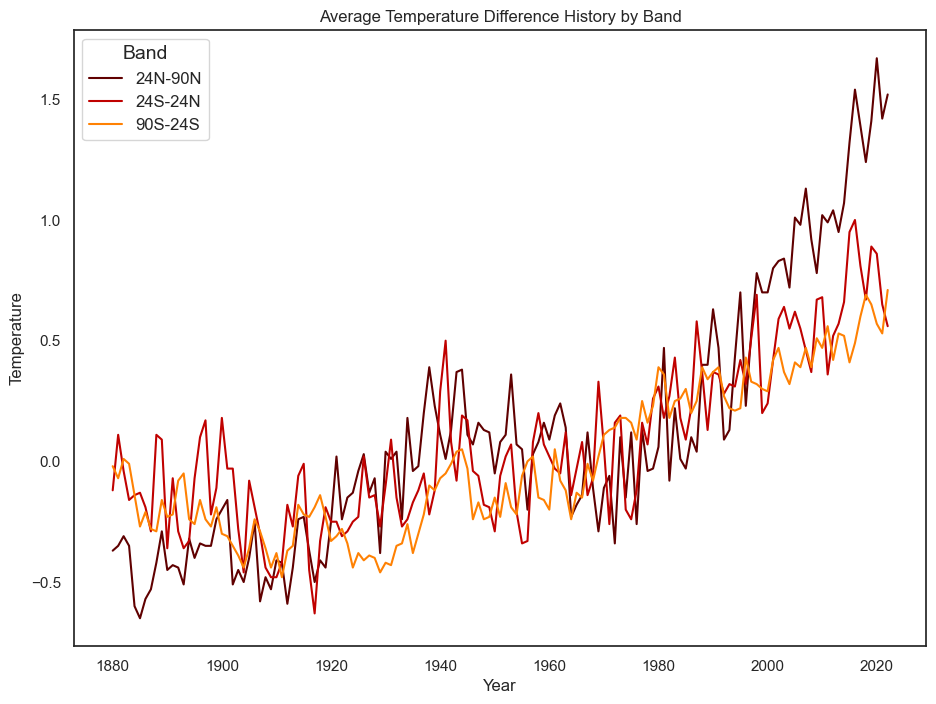

In [77]:
bands=pd.Series(["24N-90N","24S-24N","90S-24S"])

data_bands=df.loc[:,bands]
data_bands.reset_index(inplace=True)
data_bands_unpiv=pd.melt(data_bands, id_vars="Year", value_vars=bands,
                   value_name="Temperature").rename(columns={"Attribute":"Band"})
sns.set_style("white")
ax=sns.lineplot(data=data_bands_unpiv, x="Year", y="Temperature", palette = 'gist_heat',
             hue="Band").set(title="Average Temperature Difference History by Band")
plt.legend(title="Band",fontsize='12', title_fontsize='14')
plt.show()

### Ploting the average temperature in each zone
The same hue is chosen to denote equatorial height from south (light red) to north (dark red).
Although the plot is more difficult to be intepreted now, the initial conclusion of higher temperature increase, as we are moving from south to north, can be seen also in this granularity.

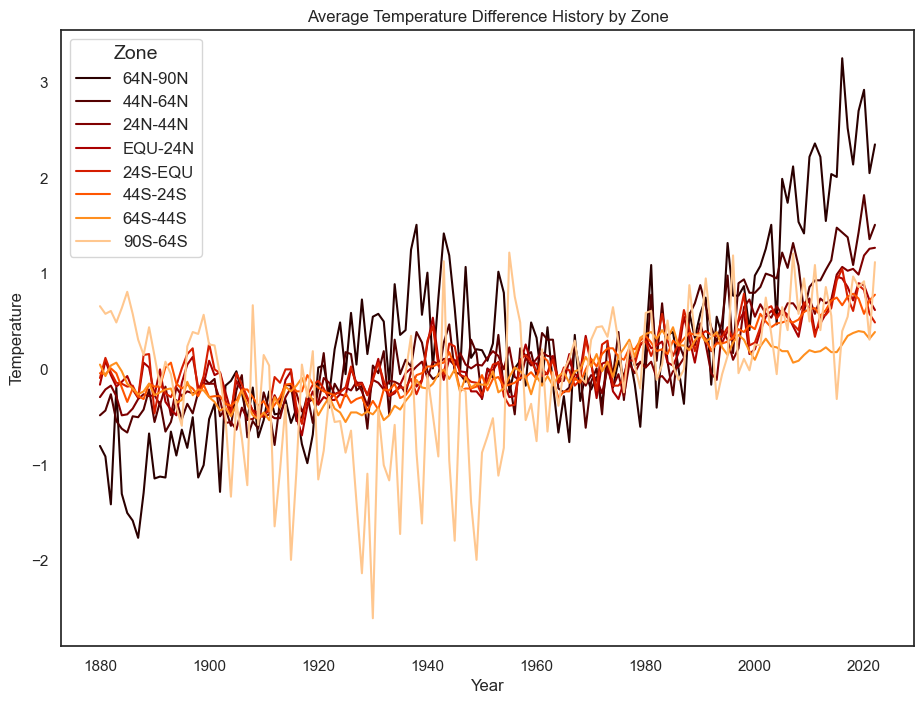

In [79]:
zones=pd.Series(["64N-90N","44N-64N","24N-44N","EQU-24N","24S-EQU","44S-24S","64S-44S","90S-64S"])

data_zones=df.loc[:,zones]

data_zones.reset_index(inplace=True)
data_zones_unpiv=pd.melt(data_zones, id_vars="Year", value_vars=zones,
                   value_name="Temperature").rename(columns={"Attribute":"Zone"})

ax=sns.lineplot(data=data_zones_unpiv, x="Year", y="Temperature", palette = 'gist_heat',
             hue="Zone").set(title="Average Temperature Difference History by Zone")
plt.legend(title="Zone",fontsize='12', title_fontsize='14')
plt.show()

### Ploting the average temperature of wider zones
We will plot the temperatures in wider zones in an attempt to produce a cleared representation.
The equatorial and mid equatorial zones will be averaged resulting in 5 wider zones instead of the 8 initial ones.
A different hue is chosen now. The plot is cleared now and confirms once again the higher temperature increase, as we move from south to north: red -> blue.

In [80]:
zones=pd.Series(["64N-90N","44N-64N","24N-44N","EQU-24N","24S-EQU","44S-24S","64S-44S","90S-64S"])
wide_zones=["77N","44N","EQU","44S","77S"]
data_wide_zones=df.loc[:,zones]
data_wide_zones["44N"]=data_wide_zones[["44N-64N","24N-44N"]].mean(axis=1)
data_wide_zones["44S"]=data_wide_zones[["64S-44S","44S-24S"]].mean(axis=1)
data_wide_zones["EQU"]=data_wide_zones[["EQU-24N","24S-EQU"]].mean(axis=1)
data_wide_zones.drop(["44N-64N","24N-44N","64S-44S","44S-24S","EQU-24N","24S-EQU"],axis=1,inplace=True)
data_wide_zones.rename(columns={"64N-90N":"77N","90S-64S":"77S"},inplace=True)
data_wide_zones=data_wide_zones[wide_zones]
data_wide_zones

Attribute,77N,44N,EQU,44S,77S
Year,,,,,
1880,-0.80,-0.385,-0.125,0.005,0.66
1881,-0.91,-0.320,0.105,-0.060,0.58
1882,-1.41,-0.215,-0.045,0.025,0.61
1883,-0.19,-0.410,-0.160,0.015,0.49
1884,-1.30,-0.550,-0.140,-0.105,0.64
...,...,...,...,...,...
2018,2.14,1.070,0.665,0.585,0.97
2019,2.70,1.210,0.890,0.570,0.86
2020,2.92,1.505,0.855,0.485,0.92


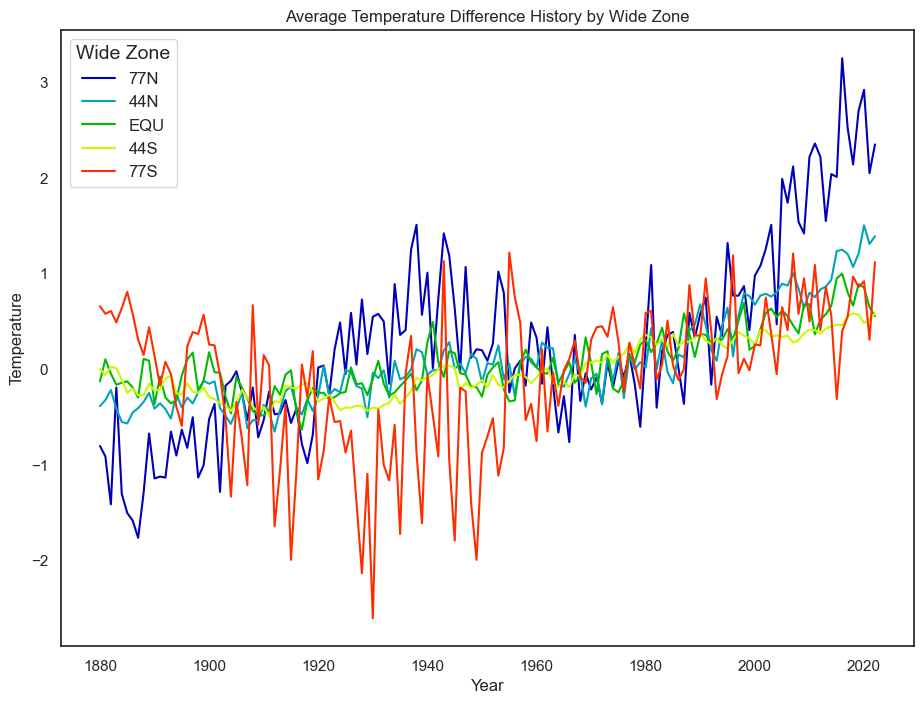

In [81]:
data_wide_zones.reset_index(inplace=True)
data_wide_zones_unpiv=pd.melt(data_wide_zones, id_vars="Year", value_vars=wide_zones,
                   value_name="Temperature").rename(columns={"Attribute":"Wide_Zone"})
ax=sns.lineplot(data=data_wide_zones_unpiv, x="Year", y="Temperature", palette = 'nipy_spectral',
             hue="Wide_Zone").set(title="Average Temperature Difference History by Wide Zone")
plt.legend(title="Wide Zone",fontsize='12', title_fontsize='14')
plt.show()